In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ratings = pd.read_csv('data/ratings.dat', sep='::',
                      names=['user_id', 'movie_id', 'rating', 'rating_timestamp'],engine="python"
                      ).sort_values("rating_timestamp") # sort by datetime


In [7]:
# number of users:
num_users=len(pd.unique(ratings['user_id'])) 
print(f'Number of users is  {num_users}')

# Number of movies:
num_movies=len(pd.unique(ratings['movie_id'])) 
print(f'Number of movies is {num_movies}')


Number of users is  69324
Number of movies is 36380


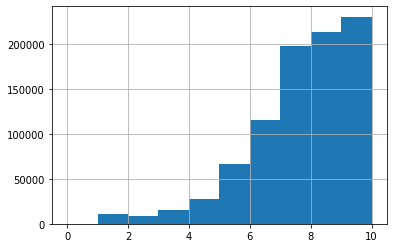

In [4]:
# ratings distribution histogram
ratings['rating'].hist(bins=10)

In [5]:
#ax = sns.countplot(x="movie_id",data=ratings)

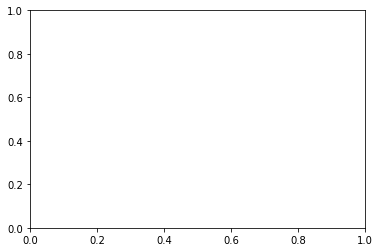

In [6]:
fig, ax = plt.subplots()
#ratings['movie_id'].value_counts().plot(ax=ax, kind='bar')
#ratings['movie_id'].value_counts().to_frame().style.bar()

## Movie popularity

 
There is no absolute definition of movie popularity
Looking at the histogram below for movie ratings distribution we call a movie popular if it is has high
ratings count relative to the common movies; we chose the bins beyond the peak count bin after trying different 
bin sizes (where we see seperation with low count of ratings)
to represent popular movies;

   unique_values  counts
0        1454468    3102
1         816692    2931
2        8579674    2858
3         993846    2826
4        7286456    2742
<bound method DataFrame.count of       unique_values  counts
0           1454468    3102
1            816692    2931
2           8579674    2858
3            993846    2826
4           7286456    2742
...             ...     ...
1680        5304992     101
1681        1623288     101
1682         413300     101
1683          74285     101
1684          83907     101

[1685 rows x 2 columns]>


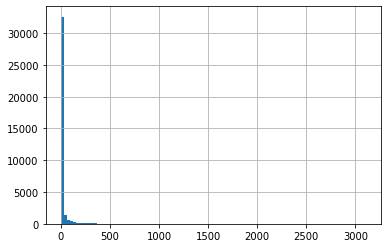

In [5]:
print(''' 
There is no absolute definition of movie popularity
Looking at the histogram below for movie ratings distribution we call a movie popular if it is has high
ratings count relative to the common movies; we chose the bins beyond the peak count bin after trying different 
bin sizes (where we see seperation with low count of ratings)
to represent popular movies;
''')
# number of ratings
counts=ratings['movie_id'].value_counts()
df=counts.rename_axis('unique_values').reset_index(name='counts')

print (df.head(5))
#print (counts.columns.tolist())
#for col in counts.columns:
#    print(col)
df['counts'].hist(bins=100)
print(df.loc[df['counts']>100].count)
#head(100).to_frame()0].head(5)

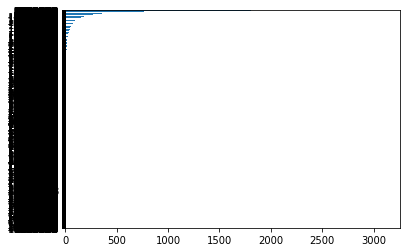

In [26]:
print(''' bar plot of rating counts for movies in descending order of rating counts''')
#counts.plot(kind='bar')
counts.sort_values().plot(kind = 'barh')
#df.plot(ax=ax, kind='bar')


In [8]:
print(''' Since movie-ids are categorical values we cannot directly apply area under
curve of distribution to find the tail values; however we'll instead define tail as values that have <25% of the
total observations, or <25% of distribution curve area''')

total_rows=ratings.shape[0]
above_tail_rows=ratings.shape[0]*3/4
print(f'\nTotal rows in dataset: {ratings.shape[0]}; 75% is: {above_tail_rows}')

sorted_counts=counts.sort_values(ascending=False)

tot=0
movie_count=0
for index, row in df.iterrows():
    tot+=row['counts']
    if (tot>above_tail_rows):
        break
    movie_count=movie_count+1
 
print(f"\nUpto tail row count: {tot}; movies above tail: {movie_count}")

num_tail_movies=num_movies-movie_count

print(f"\nTotal long tail movies count = {num_tail_movies}")

#print(df['counts'].iloc[0:2000].sum())
#sorted_counts.head(1000)
#print(f"Total ratings count: {ratings.count}")

 Since movie-ids are categorical values we cannot directly apply area under
curve of distribution to find the tail values; however we'll instead define tail as values that have <25% of the
total observations, or <25% of distribution curve area

Total rows in dataset: 888452; 75% is: 666339.0

Upto tail row count: 666369; movies above tail: 2129

Total long tail movies count = 34251


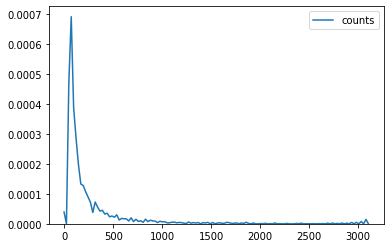

In [17]:
# build a distribution plot for clear indication of tail
#df['counts'].plot.density()

sns.kdeplot(df['counts'])

In [11]:
# Number of movies rated by each user can be found with value_counts function:
print('''To look at least number of movies rated by any user, we look at the tail end:''')
user_rate_counts=ratings['user_id'].value_counts()
print(user_rate_counts.tail(5))

print("\nFrom above least number of movies rated by any user is 1")

print(f"\n Average number of movies rated by user = {ratings.shape[0]/user_rate_counts.shape[0]}")


To look at least number of movies rated by any user, we look at the tail end:
46753    1
44706    1
10617    1
40612    1
2047     1
Name: user_id, dtype: int64

From above least number of movies rated by any user is 1

 Average number of movies rated = 12.815936760717788


### Recommender System effectiveness

In [13]:
print(''' 
If we build a content recommender system based on popular items alone it'll have limited effectiveness for the user.
While it will still provide him/her enough interesting content based upon the crowd, it will be a weak recommendation
system aas it will miss out the following:

1. Each user has personalized preferences which lead to non popular, niche items in addition to popular items. 
Those niche items would be completely missed

2. New items do not have sufficient ratings to climb high on popularity list: these will be missed from recommendations
till there is sufficient feedback through other users' interest. This could take long to build popularity as they 
would not show up in anyone's recommended items list by default

''')

 
If we build a content recommender system based on popular items alone it'll have limited effectiveness for the user.
While it will still provide him/her enough interesting content based upon the crowd, it will miss out the following:

1. Each user has personalized preferences which lead to non popular, niche items in addition to popular items. 
Those niche items would be completely missed

2. New items do not have sufficient ratings to climb high on popularity list: these will be missed from recommendations
till there is sufficient feedback through other users' interest, which could take long if they were kept out recommended
items list




1454468    3102
816692     2931
8579674    2858
993846     2826
7286456    2742
770828     2680
816711     2425
1300854    2408
1670345    2376
2267998    2269
1535109    2160
1392214    2147
1663202    2049
2084970    2017
1392190    1933
1343092    1928
1408101    1884
2024544    1863
1798709    1861
1800241    1860
Name: movie_id, dtype: int64
8     1
10    2
12    3
25    4
91    7
Name: movie_id, dtype: int64
8       1
10      1
12      1
25      1
91      3
131     1
417    23
439     6
443     1
628     2
Name: movie_id, dtype: int64


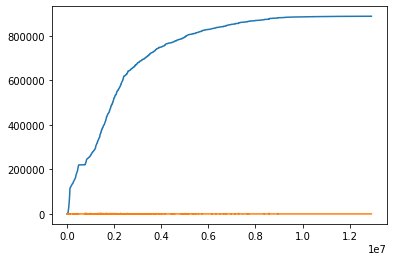

In [14]:
# Test code, not needed in the main exercise
#sns.displot(ratings.value_count, x="movie_", kind="kde")
print(ratings['movie_id'].value_counts().head(20))
cdf=ratings['movie_id'].value_counts().sort_index().cumsum()
print(cdf.head(5))
cdf.plot()
sorted_values=ratings['movie_id'].value_counts().sort_index()
print(sorted_values.head(10))
sorted_values.plot.line()